# Aula 03 - Quarentena Dados 🎲

Fonte de Referência dos Dados - [Kaggle 5000 Movie Dataset](https://web.flow.opera.com/ext/v1/index.html)

Vamos começar importando a nossa base de dados! Nessa aula iremos trabalhar com a IMBD 5000, base que contém uma série de informações sobre filmes, sendo uma pequena amostra da famosa base de dados [IMBD](https://www.imdb.com/).

In [2]:
import pandas as pd

In [3]:
# lendo arquivo de dados do Kaggle IMDB 5000 Movie Dataset

imdb = pd.read_csv("https://gist.githubusercontent.com/littlebru/f0c432ea5204715b37b85561e9afaeae/raw/50c46a2f36d2c549230d505a68fbc47b5de54e0e/movie_metadata.csv")
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


---
Esta nova tabela possui muitas colunas, a coluna que mais chamou a tenção foi a ``color``.

Vamos explora-la e descobrir quais são os valores existentes nela.

In [5]:
# Valores unicos existentes na coluna 'color'
print(imdb['color'].unique())

['Color' nan ' Black and White']


Verificamos que essa coluna color informa se o filme é ``colorido`` ou é ``preto e branco``.

Vamos descobrir agora quantos filmes de cada tipo nós temos:

---

In [9]:
# Contagem de filmes com cores em porcentagem
# Ai abaixo ele contou apenas os tipos 'Black and White' e 'Color' com 4% e 95% respectivamente

imdb['color'].value_counts(normalize=True)

Color               0.9584
 Black and White    0.0416
Name: color, dtype: float64

Agora já descobrimos quantos filmes coloridos e preto e branco temos, e também sabemos que há mais de 5000 filmes na base.

---

Fizemos algo novo, que foi chamar o ``value_counts()``, passando o parâmetro ``normalize`` como ``True``.

Desse modo, já calculamos qual é a participação de cada um dos tipos de filmes **(95% são filmes coloridos)**.

🎬 Agora vamos explorar outra coluna a fim de conhecer os diretores que tem mais filmes na nossa base de dados

**(lembrando que nossa base é uma amostra muito pequena da realidade)**

In [13]:
# Imprimindo diretores por linha (index, nome diretor) apenas os 15 primeiros

imdb['director_name'].head(15)

0         James Cameron
1        Gore Verbinski
2            Sam Mendes
3     Christopher Nolan
4           Doug Walker
5        Andrew Stanton
6             Sam Raimi
7          Nathan Greno
8           Joss Whedon
9           David Yates
10          Zack Snyder
11         Bryan Singer
12         Marc Forster
13       Gore Verbinski
14       Gore Verbinski
Name: director_name, dtype: object

In [10]:
# Quantos filmes cada diretor tem a base de dados(Apenas os 15 primeiros)

imdb['director_name'].value_counts().head(15)

Steven Spielberg     26
Woody Allen          22
Clint Eastwood       20
Martin Scorsese      20
Ridley Scott         17
Spike Lee            16
Tim Burton           16
Steven Soderbergh    16
Renny Harlin         15
Oliver Stone         14
Robert Rodriguez     13
Barry Levinson       13
Sam Raimi            13
Robert Zemeckis      13
Ron Howard           13
Name: director_name, dtype: int64

**Steven Spielberg** e **Woody Allen** são os diretores com mais filmes no IMDB 5000.

Continuando com nossa exploração de algumas informações, vamos olhar para o número de críticas por filmes.

In [11]:
# Numero de criticas para revisão (Apenas os 15 primeiros)

imdb['num_critic_for_reviews'].head(15)

0     723.0
1     302.0
2     602.0
3     813.0
4       NaN
5     462.0
6     392.0
7     324.0
8     635.0
9     375.0
10    673.0
11    434.0
12    403.0
13    313.0
14    450.0
Name: num_critic_for_reviews, dtype: float64

---
Veja que as colunas ``color`` e ``director_name`` são strings, não fazendo sentido olhar para **médias**, **medianas** e afins. 

Olhar para o número de avaliações já pode ser interessante, por isso usamos o ``.describe()``.

In [14]:
imdb["num_critic_for_reviews"].describe()

count    4993.000000
mean      140.194272
std       121.601675
min         1.000000
25%        50.000000
50%       110.000000
75%       195.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

## Plotando histograma dos dados

Agora podemos plotar um histograma para avaliar o número de review

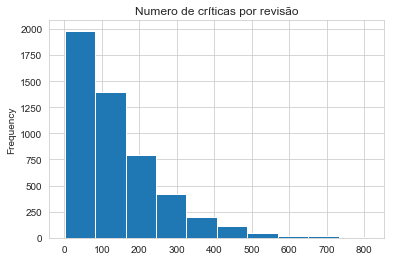

In [16]:
# Imprimindo um histograma das informações da coluna de criticas

import seaborn as sns

sns.set_style("whitegrid")
imdb["num_critic_for_reviews"].plot(kind='hist',
                                   title ='Numero de críticas por revisão' )

Logo, pelo histograma fica evidente que poucos filmes fazem muito muito sucesso. Claro que não conseguimos afirmar isso com propriedade, pois, novamente, estamos lidando com um número restrito de dados, mas são pontos interessantes de se pensar.

---
Outra informação interessante de se analisar, são os orçamentos e receitas de um filme, ou seja o aspecto financeiro. Vamos começar pelo gross:

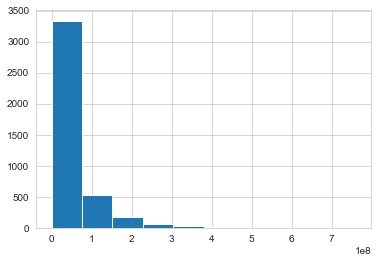

In [17]:
# Imprimindo um histograma das informações da coluna 'gross' (faturamento do filme)

imdb['gross'].hist()

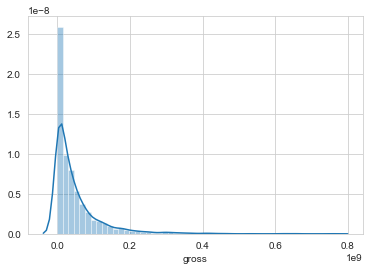

In [18]:
# Imprimindo as mesma infomações anteriores da coluna 'gross' (faturamento do filme)
# Porém com a biblioteca seaborn
# Removendo valores Nan (Not a Number)

import seaborn as sns

sns.distplot(imdb['gross'].dropna())

Como você deve ter reparado, essa é a primeira vez que as escalas estão totalmente diferentes, pois no eixo X temos valores tão altos que a escala teve que ser de centena de milhões.

---
Veja como pouquíssimos filmes tem alto faturamento, o que nos acende um primeiro alerta de que tem algo estranho (ou temos filmes que rendem muito dinheiro neste dataset).

💰 Vamos tentar conhecer quais são esses filmes com faturamento astronômico.

In [19]:
imdb.sort_values("gross", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000


Nessa lista temos Avatar, Titanic, Jurassic World e The Avengers, o que parece fazer sentido para nós, pois sabemos que esses foram filmes com bilheterias gigantescas. 

Analisando esses dados conseguimos verificar que os maiores faturamentos fazem sentido, mas encontramos um problema nos dados, dado que encontramos duas linhas diplicadas.

---
Podemos usar o pandas para remover esses dados, mas por enquanto vamos manter todas as informações (Se estiver curioso em saber como se faz, consulte o ``.drop_duplicates()``).



In [20]:
# Removendo duplicatas dentro da tabela com drop_duplicates (do Pandas)

imdb = imdb.drop_duplicates()

---
## ➕Adicionando uma coluna no dataset

Maravilha, agora temos o faturamento e parece estar OK. Queremos começar a responder algumas perguntas e uma delas é: será que filmes coloridos tem faturamento maior que filmes preto e branco?

Para começar a responder esta pergunta percisamos transformas a coluna Color:

In [21]:
 # Quantidade de filmes 'Color' e 'Black and White' ('Coloridos' e 'Preto e Branco')

color_or_bw = imdb.query("color in['Color',' Black and White']")
len(color_or_bw)

4979

In [60]:
# Perguntando se o filme é colorido
# Então, dentro da coluna criada (color_0_ou_1) 
# Se for retornará 1, senão retornará 0

color_or_bw = imdb.query("color in['Color',' Black and White']")
color_or_bw["color_0_ou_1"] = (color_or_bw["color"]=="Color") * 1
color_or_bw.head()

c:\users\anapaula\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


In [23]:
# Visualizando o numero de filmes
# 1 - Coloridos
# 0 - Preto e Branco

color_or_bw['color_0_ou_1'].value_counts()

1    4772
0     207
Name: color_0_ou_1, dtype: int64

---
## Plotando gráfico 
Veja que agora nós temos uma última coluna em nosso dataframe com valores 0 e 1. Agora podemos construir gráficos com essa informação de filmes coloridos ou não.

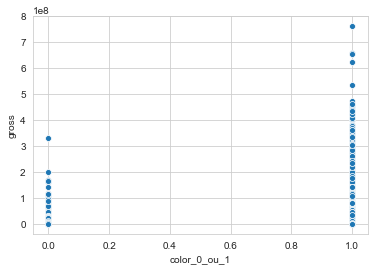

In [25]:
# OS FILMES PRETO E BRANCO VENDEM MAIS QUE OS COLORIDOS?

# Imprimindo a tabela fazendo a comparação do faturamento com os filmes
# Utilizando a bibioteca Seaborn com o grafico scatterplot

sns.scatterplot(data=color_or_bw, x='color_0_ou_1', y='gross')

Repare como filmes coloridos tem valores bem maiores (isso já era até esperado), mas também temos pontos bem altos em filmes preto e branco, chamando muito atenção.

Vamos explorar algumas estatísticas destes filmes:

In [26]:
# Visualizando a média dos valores dos filmes Preto e Branco e Coloridos
# Filmes coloridos faturam ~= 50% a mais que filmes em Preto e Branco

color_or_bw.groupby('color').mean()['gross']

color
 Black and White    3.269160e+07
Color               4.887103e+07
Name: gross, dtype: float64

In [27]:
# Visualizando a nota média por cor

color_or_bw.groupby('color').mean()['imdb_score']

color
 Black and White    7.220290
Color               6.408738
Name: imdb_score, dtype: float64

In [28]:
# Visualizando a mediana por cor

color_or_bw.groupby("color").median()["imdb_score"]

color
 Black and White    7.4
Color               6.5
Name: imdb_score, dtype: float64

Das estatísticas temos duas bem interessantes, a média e mediana das notas de filmes preto e branco são maiores.

---
## Comparando Faturamento com Orçamento
A partir de agora, vamos fazer uma investigação melhor em relação às finanças dos filmes (faturamento e orçamento).

Vamos iniciar plotando e interpretando um gráfico de gross por budget:

In [33]:
# Comparando valores de faturamento e de Orçamento dos filmes
# Imprimindo os 15 primeiros

imdb[['budget', 'gross']].head(15)

,budget,gross
0,237000000.0,760505847.0
1,300000000.0,309404152.0
2,245000000.0,200074175.0
3,250000000.0,448130642.0
4,NaN,NaN
5,263700000.0,73058679.0
6,258000000.0,336530303.0
7,260000000.0,200807262.0
8,250000000.0,458991599.0
9,250000000.0,301956980.0


In [34]:
# Removendo valores NaN(Not a Number)
# Imprimindo os 15 primeiros

imdb[['budget', 'gross']].dropna().head(15)

,budget,gross
0,237000000.0,760505847.0
1,300000000.0,309404152.0
2,245000000.0,200074175.0
3,250000000.0,448130642.0
5,263700000.0,73058679.0
6,258000000.0,336530303.0
7,260000000.0,200807262.0
8,250000000.0,458991599.0
9,250000000.0,301956980.0
10,250000000.0,330249062.0


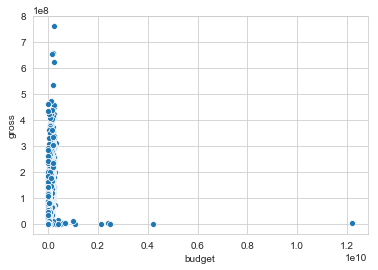

In [36]:
# Imprimindo um grafico das informações tratadas

budget_gross = imdb[['budget', 'gross']].dropna()

sns.scatterplot(x='budget', y='gross', data=budget_gross)

Para plotar os dados, primeiro removemos as linhas com informações de faturamento e orçamento vazias e também com valores igual a 0, para então gerar o gráfico.

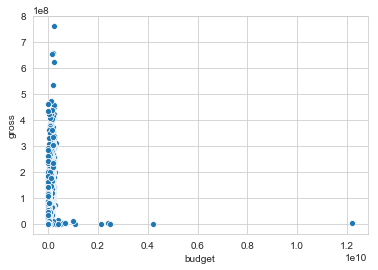

In [37]:
# Buscando por valores > 0 (Maior do que zero)
budget_gross = imdb[['budget', 'gross']].dropna().query('budget > 0 | gross > 0')

sns.scatterplot(x='budget', y='gross', data=budget_gross)

# Não mudou :( , o que será?

Não mudou, o que será que está deixando esses valores nos extremos do gráfico?

Procurando pelo [Outlier](https://pt.wikipedia.org/wiki/Outlier) dentro do grafico

In [43]:
# Pegando apenas os 5 primeiros
imdb.sort_values('budget', ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000
3859,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,211667.0,Crime|Drama,...,131.0,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973


Ordenando os dados pelo budget percebemos que as primeiras posições são de filmes asiáticos.

Países como a Coreia usam moedas que tem três casas decimais a mais que o dólar.

Então provavelmente o que está ocorrendo é que os dados de orçamento tem valores na moeda local, por isso detectamos valores tão discrepantes.

Como não temos garantia dos números, vamos precisar trabalhar apenas com filmes americanos, assim garantimos que tanto gross e budget estão em dólares. Então vamos iniciar esse processo:

In [44]:
# Quais paises estão inseridos dentro dessa tabela?

imdb['country'].unique()

array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

❗ Existem filmes de diversos países dentro da tabela

In [46]:
# Imprimindo apenas filmes Estadunidenses

imdb_usa = imdb.query("country == 'USA'")
imdb_usa.sort_values('budget', ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


Agora temos os dados para fazer uma análise melhor entre gross e budget. Vamos plotar o gráfico novamente:

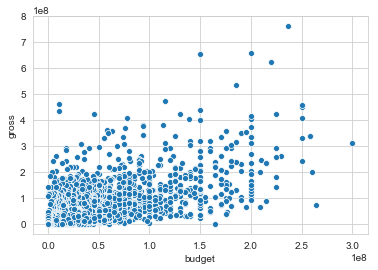

In [47]:
# Buscando por valores > 0 (Maior do que zero)
budget_gross = imdb_usa[['budget', 'gross']].dropna().query('budget > 0 | gross > 0')

sns.scatterplot(x='budget', y='gross', data=budget_gross)

Aparentemente temos uma relação entre orçamento e faturamento. 

``Quanto maior o orçamento, maior o faturamento``

---

Podemos construir uma nova informação, o ``lucro``, para analisar.

c:\users\anapaula\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


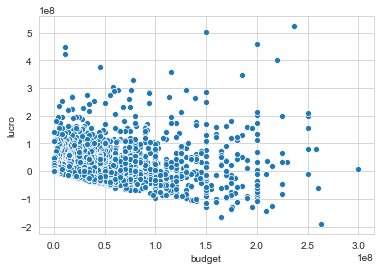

In [48]:
# Relação Lucro/Prejuizo

imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']

budget_gross = imdb_usa.query('budget > 0 | gross > 0')[['budget', 'lucro']].dropna()

sns.scatterplot(x='budget', y='lucro', data=budget_gross)

Construímos nossa coluna lucro na base de dados e plotamos o **orçamento** contra **lucro**.

---
## Realizamos uma Feature Engineer 😃
A variavel ``lucro`` foi criada como uma feature para o nosso Dataset apartir de duas features, que eram o ``gross`` e o ``budget``

De forma bem simplista esse processo de construir novas informações a partir das existentes no dataset é conhecido como ``Feature Engineering``.

## Analisando o gráfico
- Repare que temos pontos interessantes nesta visualização, um deles são esses filmes com muito custo e prejuizo.

Isso pode ser um prejuizo real, mas também podem ser filmes que ainda não tiveram tempo de recuperar o investimento (lançamentos recentes).

- Outros pontos interessantes de se analisar seriam os filmes com baixos orçamentos e muito lucro, será que são estão corretos ou pode ser algum erro da base?

Parece que nem sempre gastar uma tonelada de dinheiro vai gerar lucros absurdos, será que é isso é verdade?

---
Já que essa nova feature (lucro) parace ser interessante de se analisar, vamos ver o lucro em relação ao ano de produção:


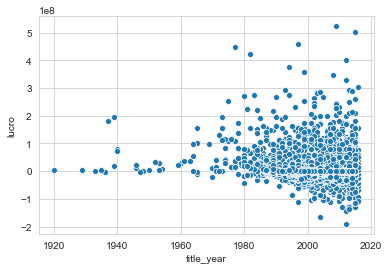

In [49]:
# Relação Lucro/Ano

budget_gross = imdb_usa.query('budget > 0 | gross > 0')[['title_year', 'lucro']].dropna()

sns.scatterplot(x='title_year', y='lucro', data=budget_gross)

veja como alguns pontos mais recentes reforça a teoria de que alguns filmes podem ainda não ter recuperado o dinheiro investido **(Claro que temos muitas variáveis para se analisar, mas é um indício relevante)**.

O instrutor Paulo sugeriu uma análise com os nomes dos **Diretores** e o **Orçamento** de seus filmes.

In [50]:
# Quantidade de filmes por diretor
filmes_por_diretor = imdb_usa['director_name'].value_counts()
filmes_por_diretor.head()

Steven Spielberg    24
Clint Eastwood      20
Martin Scorsese     20
Woody Allen         18
Spike Lee           16
Name: director_name, dtype: int64

In [53]:
# Unindo a tabela de faturamento com os dados dos diretores

gross_director = imdb_usa[['director_name', 'gross']].set_index('director_name').join(filmes_por_diretor, on='director_name')
gross_director.columns = ['faturamento', 'filmes_produzidos']

# Alinhando o index
gross_director = gross_director.reset_index()

gross_director.head()

,director_name,faturamento,filmes_produzidos
0,James Cameron,760505847.0,6.0
1,Gore Verbinski,309404152.0,7.0
2,Christopher Nolan,448130642.0,8.0
3,Andrew Stanton,73058679.0,3.0
4,Sam Raimi,336530303.0,11.0


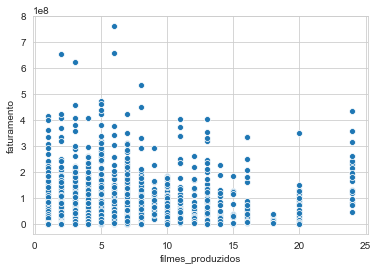

In [54]:
# Relação Faturamento/Diretor/Quantidade filmes produzidos

sns.scatterplot(x='filmes_produzidos', y='faturamento', data=gross_director)

Essa imagem aparentemente não é muito conclusiva, então não conseguimos inferir tantas informações.

---

## 😎 Plotando vários gráficos de uma vez só
Para finalizar, que tal realizar uma análise das correlações dos dados?

Existem várias formas de calcular a correlação, esse é um assunto denso.

Você pode ler mais sobre essas métricas neste [link](https://pt.wikipedia.org/wiki/Correla%C3%A7%C3%A3o).

Vamos então inciar a análise das correlações plotando o pairplot.

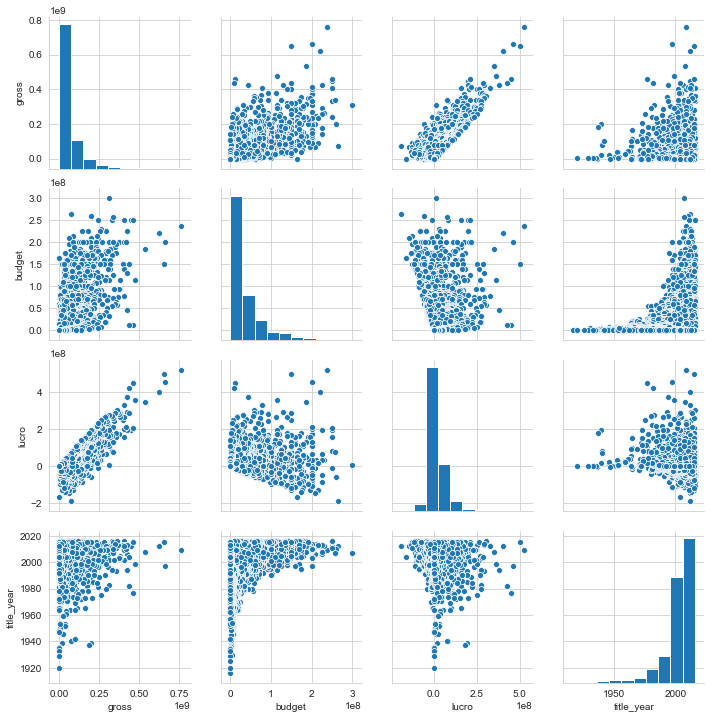

In [56]:
# Plotando todas as informações (ano do filme, faturamento, orçamento, lucro)
# Utilizando o gafico pairplot do seaborn

sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]])

O pairplot mostra muita informação e a melhor forma de você entender é assistindo as conclusões que tiramos sobre esses gráficos na vídeoaula.

---
Embora plotamos um monte de informação, não necessariamente reduzimos a correlação em um número para simplificar a análise. Vamos fazer isso com a ajuda do ``.corr()`` do [``pandas``](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html).

In [57]:
# Realizando uma Correlação dos dados

imdb_usa[['gross', 'budget', 'lucro', 'title_year']].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.645673,0.797037,0.034827
budget,0.645673,1.000000,0.053455,0.229453
lucro,0.797037,0.053455,1.000000,-0.123035
title_year,0.034827,0.229453,-0.123035,1.000000


``A correlação é uma métrica que vai de 1 a -1.``

- Quando a **correlação é 1**, dizemos que é totalmente correlacionada (relação linear perfeita e positiva), ou seja se uma variável aumenta em 10 a outra também irá aumentar em 10.


- Quando o valor da **correlação é -1**, também temos variáveis totalmente correlacionda, só que de maneira negativa (relação linear perfeita negativa), neste caso, se uma variável aumenta em 10 a outra reduz em 10.


- Agora quando a **correlação é 0**, temos a inexistência de correlação, ou seja, uma variável não tem influêcia sobre a outra.

----
Veja que ``lucro`` e ``gross`` tem uma correlação alta, o que indica que quanto maior o ``orçamento`` maior o ``lucro`` 

**(mas repare que a correlação não é perfeita)**

---
Já o ``title_years`` e ``lucro`` tem correlação negativa, mas muito perto de zero 

**(ou seja quase não tem correlação)**